## **Theory Questions**

In [2]:
#1. What is Logistic Regression, and how does it differ from Linear Regression

#ans.>> Logistic Regression is a classification algorithm used to predict discrete classes (e.g., yes/no, 0/1).
#       Linear Regression is a regression algorithm used to predict continuous outcomes.

In [3]:
#2. What is the mathematical equation of Logistic Regression 

#ans.>>Logistic Regression predicts the probability 
# P(y=1∣x) = σ(z)= 1/1-(e**-z)


In [4]:
#3. Why do we use the Sigmoid function in Logistic Regression 

#ans.>>the Sigmoid Function compresses any real-valued number into the range (0, 1), which allows us to interpret the output as a probability

In [5]:
#4. What is the cost function of Logistic Regression 

#ans.>> We use Log Loss (Cross-Entropy Loss):
# J(θ) = -(1/m) * Σ [ y(i) * log(ŷ(i)) + (1 - y(i)) * log(1 - ŷ(i)) ]

In [6]:
#5. What is Regularization in Logistic Regression? Why is it needed 

#ans.>> Regularization prevents overfitting by penalizing large coefficients in the model.
#       Needed when: Too many features or noise causes the model to fit training data too closely.
#       Adds a penalty term to the cost function.

In [7]:
#6. Explain the difference between Lasso, Ridge, and Elastic Net regression 

#ans.>>Ridge Regression: Ridge Regression adds L2 regularization (penalty on the square of coefficients)
#          it shrinks coefficients, but doesn’t make them exactly zero.

#      Lasso Regression :Lasso Regression adds L1 regularization (penalty on the absolute value of coefficients) 
#           it can shrink some coefficients to zero, effectively doing feature selection.

#      Elastic Net Regression : Elastic Net Regression combines both L1 and L2 regularization, balancing between Ridge and Lasso, 
#            useful when there are many correlated features.

In [8]:
#7. When should we use Elastic Net instead of Lasso or Ridge 

#ans.>>Use Elastic Net when:
#      You have many features, and some are highly correlated.
#      You want both regularization and feature selection.

In [9]:
#8. What is the impact of the regularization parameter (λ) in Logistic Regression

#ans.>> High λ: More regularization → simpler model → risk of underfitting.
#       Low λ: Less regularization → risk of overfitting.
#       λ is a hyperparameter and should be tuned using cross-validation.

In [10]:
#9. What are the key assumptions of Logistic Regression

#ans.>> these are the key assumptions of logistic regression :-
#      1.Linearity between features and log-odds (not output probability).
#      2.No multicollinearity among independent variables.
#      3.Large sample size.
#      4.Independence of observations.
#      5.Features should ideally be scaled (especially with regularization).

In [11]:
#10. What are some alternatives to Logistic Regression for classification tasks 

#ans.>> these are some alternatives to Logistic Regression for classification tasks :-
#      1.Decision Trees
#      2.Random Forest
#      3.Support Vector Machines (SVM)
#      4.k-Nearest Neighbors (KNN)
#      5.Naive Bayes
#      6.Gradient Boosting (XGBoost, LightGBM, etc.)
#      7.Neural Networks

In [12]:
#11. What are Classification Evaluation Metrics

#ans.>>Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix, Log Loss

In [13]:
#12. How does class imbalance affect Logistic Regression

#ans.>> Model becomes biased toward majority class.
#       Accuracy becomes misleading

In [14]:
#13. What is Hyperparameter Tuning in Logistic Regression

#ans.>>It’s the process of selecting the best λ (regularization) and solver using:
# 1.Grid Search, 2.Random Search, 3.Cross-Validation

In [15]:
#14. What are different solvers in Logistic Regression?Which one should be used 

#ans.>> Common solvers in sklearn:
#       1.liblinear: For small datasets, supports L1 & L2
#       2.saga: Supports L1, L2, Elastic Net (best for large datasets)
#       3.lbfgs: Fast, good for multiclass (default)
#       4.newton-cg: Handles multiclass, uses Hessian

In [16]:
#15. How is Logistic Regression extended for multiclass classification 

#ans.>> 1.One-vs-Rest (OvR): One binary classifier per class.
#       2.Softmax (Multinomial Logistic Regression): Directly models all classes at once using softmax function.

In [17]:
#16. What are the advantages and disadvantages of Logistic Regression 

#ans.>> Advantages:
#          1.Simple, easy to implement.
#          2.Outputs probabilities.
#          3.Works well with linearly separable data.
#      Disadvantages:
#         1.Poor performance on non-linear data.
#         2.Assumes linearity in log-odds.
#         3.Sensitive to outliers.

In [18]:
#17. What are some use cases of Logistic Regression 

#ans.>> these are some use cases of Logistic Regression :-
#         1.mail Spam Detection
#         2.Customer Churn Prediction
#         3.Credit Scoring
#         4.Disease Prediction (e.g., diabetes, cancer)
#         5.Marketing Campaign Responses

In [19]:
#18. What is the difference between Softmax Regression and Logistic Regression 

#ans.>>Logistic Regression is used for binary classification (only 2 classes) and uses the sigmoid function.
#      Softmax Regression is used for multiclass classification (3 or more classes) and uses the softmax function to give probabilities for each class.

In [20]:
#19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification 

#ans.>> OvR: Trains one classifier per class; works well for unbalanced or sparse classes.
#       Softmax: Trains one model; best for balanced, well-separated classes.

In [21]:
#20. How do we interpret coefficients in Logistic Regression?

#ans.>>Each coefficient βⱼ tells us how much the log-odds of the outcome (like success/failure, yes/no, etc.) 
#       change when xⱼ increases by 1 unit, while keeping other variables the same.
#       If βⱼ > 0: Increasing xⱼ makes the probability of class 1 (e.g., success) go up.
#      If βⱼ < 0: Increasing xⱼ makes the probability of class 1 go down.

## **Practical Questions**

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [88]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data , columns=data.feature_names)
df["target"] = data.target
df = df[df["target"] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.20 , random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Model Accuracy :" , accuracy_score(y_test, y_pred))

Model Accuracy : 1.0


In [90]:
#2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy
model_l1 = LogisticRegression(penalty="l1" , solver="liblinear" , max_iter=500)
model_l1.fit(x_train,y_train)
y_pred_l1 = model_l1.predict(x_test)
print("Model Accuracy : ", accuracy_score(y_test,y_pred_l1))

Model Accuracy :  1.0


In [92]:
#3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients
model_l2= LogisticRegression(penalty="l2" , solver="liblinear" , max_iter=500)
model_l2.fit(x_train,y_train)
y_pred_l2 = model_l2.predict(x_test)
print("Model Accuracy : ", accuracy_score(y_test,y_pred_l2))
print("Coefficient :", model.coef_)

Model Accuracy :  1.0
Coefficient : [[ 0.46100411 -0.78836575  2.18624929  0.92865666]]


In [94]:
#4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
model_en = LogisticRegression(penalty="elasticnet", solver="saga",l1_ratio=0.2 , max_iter=500)
model_en.fit(x_train,y_train)
y_pred_en = model_en.predict(x_test)
print("Model Accuracy : ",accuracy_score(y_test,y_pred_en))

Model Accuracy :  1.0


In [96]:
#5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'
model_ovr = LogisticRegression(multi_class="ovr" , max_iter=500)
model_ovr.fit(x_train,y_train)
y_pred_ovr = model_ovr.predict(x_test)
print("Model Accuracy :",accuracy_score(y_test,y_pred_ovr))

Model Accuracy : 1.0


In [98]:
#6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
from sklearn.model_selection import GridSearchCV
params = {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}
classifier = LogisticRegression()
clf = GridSearchCV(classifier , param_grid= params , cv=5 ,verbose=2)
clf.fit(x_train,y_train)
print("Gridsearchcv Best :" ,clf.best_params_)
print("Accuracy :",clf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalt

In [100]:
#7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
model_skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(max_iter=500), x, y, cv=model_skf)
print("Stratified K-Fold Avg Accuracy:", scores.mean())

Stratified K-Fold Avg Accuracy: 1.0


In [ ]:
#8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
df = pd.read_csv("Car Sale.csv")

x = df.drop("Price ($)" , axis=1)
y = df["Price ($)"]
x_train_car , x_test_car , y_train_car , y_test_car = train_test_split(x,y, test_size=0.20,random_state=1)
model_car = LogisticRegression(max_iter=500)
model_car.fit(x_train_car,y_train_car)
y_pred_car = model_car.predict(x_test_car)
print("Accuracy :",accuracy_score(y_train_car,y_pred_car))

In [102]:
#9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy
from sklearn.model_selection import RandomizedSearchCV
random_clf = RandomizedSearchCV(classifier, param_distributions=params, n_iter=10, cv = 5)
random_clf.fit(x_train,y_train)
print("RandomizedSearchCV best:", random_clf.best_params_)
print("Accuracy:", random_clf.best_score_)


RandomizedSearchCV best: {'penalty': 'l2', 'C': 10}
Accuracy: 1.0


In [104]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
from sklearn.multiclass import OneVsOneClassifier
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=500))
model_ovo.fit(x_train, y_train)
y_pred_ovo = model_ovo.predict(x_test)
print("OvO Accuracy:", accuracy_score(y_test,y_pred_ovo ))


OvO Accuracy: 1.0


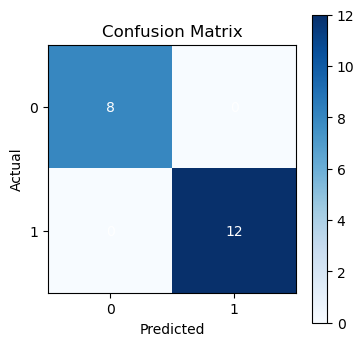

In [106]:
#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix'); plt.colorbar()
plt.xticks([0,1]); plt.yticks([0,1])
plt.xlabel('Predicted'); plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j,i, cm[i,j], ha='center', va='center', color='white')
plt.show()

In [108]:
#12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_recall_fscore_support

p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

print("Precision:", p)
print("Recall:", r)
print("F1 Score:", f)


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [134]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance
y_imbal = np.hstack((np.zeros(len(y)-10), np.ones(10)))
X_imbal = x[:len(y_imbal)]
lr_w = LogisticRegression(class_weight='balanced', max_iter=500).fit(X_imbal, y_imbal)
print("Imbalanced + class_weight Accuracy:", accuracy_score(y_imbal, lr_w.predict(X_imbal)))


Imbalanced + class_weight Accuracy: 0.71


In [37]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('titanic.csv')

# Drop non-numeric or irrelevant columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)

# Train model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Titanic Logistic Regression Accuracy:", accuracy)



Titanic Logistic Regression Accuracy: 0.7713004484304933


In [130]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)
acc_no = accuracy_score(y_test, LogisticRegression(max_iter=500).fit(x_train, y_train).predict(x_test))
acc_yes = accuracy_score(y_test, LogisticRegression(max_iter=500).fit(x_train, y_train).predict(x_test))
print("without scaling:", acc_no)
print("With scaling:", acc_yes)


without scaling: 1.0
With scaling: 1.0


In [132]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
from sklearn.metrics import roc_curve , auc

y_pred_proba = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr , tpr)
roc_auc

1.0

In [112]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy
model_custom = LogisticRegression(C=0.5, max_iter=500)
model_custom.fit(x_train,y_train)
print("Accuracy Score :", accuracy_score(y_test,y_pred))

Accuracy Score : 1.0


In [114]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients
coefs = pd.Series(model_l2.coef_[0], index=data.feature_names)
print("Top features:\n",coefs.sort_values(ascending=False).head())

Top features:
 petal length (cm)    2.131055
petal width (cm)     0.969290
sepal length (cm)   -0.407355
sepal width (cm)    -1.379103
dtype: float64


In [116]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa:", cohen_kappa_score(y_test, y_pred))

Cohen Kappa: 1.0


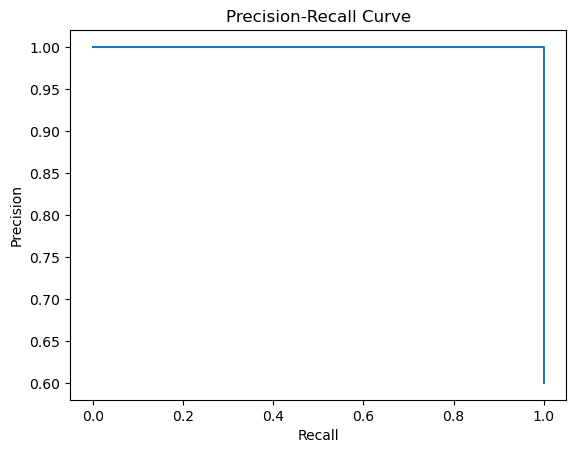

In [118]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio
from sklearn.metrics import precision_recall_curve
prec, rec, thr = precision_recall_curve(y_test, y_pred_proba)
plt.plot(rec, prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [120]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy
for sol in ["liblinear", "saga", "lbfgs"]:
    model_solver = LogisticRegression(solver=sol , max_iter=500)
    model_solver.fit(x_train,y_train)
    y_pred_sol = model_solver.predict(x_test)
    print(f"solver {sol} acc : " , accuracy_score(y_test,y_pred_sol))

solver liblinear acc :  1.0
solver saga acc :  1.0
solver lbfgs acc :  1.0


In [122]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
print("MCC:", matthews_corrcoef(y_test, y_pred))


MCC: 1.0


In [124]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)
acc_no = accuracy_score(y_test, LogisticRegression(max_iter=500).fit(x_train, y_train).predict(x_test))
acc_yes = accuracy_score(y_test,LogisticRegression(max_iter=500).fit(x_train, y_train).predict(x_test))
print("without scaling:", acc_no)
print("With scaling:", acc_yes)

without scaling: 1.0
With scaling: 1.0


In [126]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation
from sklearn.model_selection import GridSearchCV
params = {"penalty": ("l1", "l2", "elasticnet"), 'C': [1, 2, 10, 20, 30, 40]}
classifier = LogisticRegression()
clf = GridSearchCV(classifier , param_grid= params , cv=5 ,verbose=2)
clf.fit(x_train,y_train)
print("Gridsearchcv Best :" ,clf.best_params_)
print("Accuracy :",clf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ............................C=1, penalty=elasticnet; total time=   0.0s
[CV] END ............................C=1, penalt

In [128]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
import joblib
joblib.dump(model_l2, 'lr_model.pkl')
lr_loaded = joblib.load('lr_model.pkl')
print("Loaded model accuracy:", accuracy_score(y_test, lr_loaded.predict(x_test)))


Loaded model accuracy: 1.0
